<a href="https://colab.research.google.com/github/mzouros/MSc_AI_thesis/blob/main/PSA_Basic_CNN_(DoF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine's GPU availability

In [2]:
# Check if machine uses GPU ('/device:G:0')
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# Check if GPU is being shared by others (Util)

# installs/imports
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 11.2 GB  | Proc size: 3.6 GB
GPU RAM Free: 10887MB | Used: 554MB | Util   5% | Total 11441MB


# Google Drive Mount

In [4]:
# Mount Google Colab Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [5]:
# Imports

import os
import csv

# copy images
import glob
import shutil

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

#NumPy
import numpy as np

# Visualization
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Folder Management

In [ ]:
# # Create folders for Train, Validation and Test datasets

# # Train, Test & Validation datasets (csvs)
# train_data = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/dof-20210913T170626Z-001/dof/dof_train_dataset.csv'
# valid_data = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/dof-20210913T170626Z-001/dof/dof_valid_dataset.csv'
# test_data = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/dof-20210913T170626Z-001/dof/dof_test_dataset.csv'

# # Images' Directory
# images = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/unsplash-square/'

# # New directories for Train, Test & Validation images
# train_deep = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/train/deep'
# train_shallow = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/train/shallow'
# valid_deep = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/validation/deep'
# valid_shallow = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/validation/shallow'
# test_deep = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/test/deep'
# test_shallow = '/home/mike/Artificial Intelligence MSc/3rd Semester/sniafas/test/shallow'
 

# # Train Dataset (560)
# with open(train_data) as csv_file:
#     print("Train Data:")
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if line_count == 0:
#             line_count += 1
#         else:
# #             print(f'{row[0]} has DoF label {row[1]}')
#             for image in glob.iglob(os.path.join(images, "*.jpg")):
#                 if os.path.basename(os.path.normpath(image)) == row[0]:
#                     if (row[1] == '0'): # shallow
#                         shutil.copy((image), train_shallow)
#                     else: # deep
#                         shutil.copy((image), train_deep)
#             line_count += 1
#     print(f'Total {line_count-1} training data')

# # Validation Dataset (140)
# with open(valid_data) as csv_file:
#     print("Validation Data:")
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if line_count == 0:
#             line_count += 1
#         else:
# #             print(f'{row[0]} has DoF label {row[1]}')
#             for image in glob.iglob(os.path.join(images, "*.jpg")):
#                 if os.path.basename(os.path.normpath(image)) == row[0]:
#                     if (row[1] == '0'): # shallow
#                         shutil.copy((image), valid_shallow)
#                     else: # deep
#                         shutil.copy((image), valid_deep)
#             line_count += 1
#     print(f'Total of {line_count-1} validation data')

# # Test Dataset (500)
# with open(test_data) as csv_file:
#     print("Test Data:")
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if line_count == 0:
#             line_count += 1
#         else:
# #             print(f'{row[0]} has DoF label {row[1]}')
#             for image in glob.iglob(os.path.join(images, "*.jpg")):
#                 if os.path.basename(os.path.normpath(image)) == row[0]:
#                     if (row[1] == '0'): # shallow
#                         shutil.copy((image), test_shallow)
#                     else: # deep
#                         shutil.copy((image), test_deep)
#             line_count += 1
#     print(f'Total of {line_count-1} test data')

***torchvision.datasets.ImageFolder -> loads a dataset from a folder with the folder's name as Label***

***torchvision.transforms.Compose -> compose 2 or more transforms together***


# Tensors & Dataloaders

In [28]:
# Image paths

# Train, Validation & Test folders
train_images = "/content/drive/My Drive/PSA_test_images/train"
val_images = "/content/drive/My Drive/PSA_test_images/validation"
test_images = "/content/drive/My Drive/PSA_test_images/test"

# load, resize and create tensors
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
train_data = ImageFolder(train_images, transforms.Compose([transforms.Resize((150,150)), transforms.ToTensor()]))
val_data = ImageFolder(val_images, transforms.Compose([transforms.Resize((150,150)), transforms.ToTensor()]))
test_data = ImageFolder(test_images, transforms.Compose([transforms.Resize((150,150)), transforms.ToTensor()]))

# check folder lengths
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Length of Training Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")
print(f"Length of Test Data : {len(test_data)}")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# check that labels are OK
print("Classes :", train_data.classes)
print("Labels :", train_data.class_to_idx)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# example
img, label = train_data[0]
print(f"Shape: {img.shape}\nLabel: {label}")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Length of Training Data : 700
Length of Validation Data : 500
Length of Test Data : 140
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Classes : ['deep', 'shallow']
Labels : {'deep': 0, 'shallow': 1}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape: torch.Size([3, 150, 150])
Label: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


***torch.utils.data.DataLoader -> provides an iterable over the given dataset***

In [7]:
# Dataloaders

batch_size = 8

# if we have only 1 folder with images, split them to Train & Validation
# val_size = 140
# train_size = len(train_dataset) - val_size 
# train_data, val_data = random_split(train_dataset, [train_size, val_size])

# load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_dl = DataLoader(test_data, batch_size=batch_size,shuffle=False)

for X, y in train_dl:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([8, 3, 150, 150])
Shape of y:  torch.Size([8]) torch.int64


# Datasets Visualization

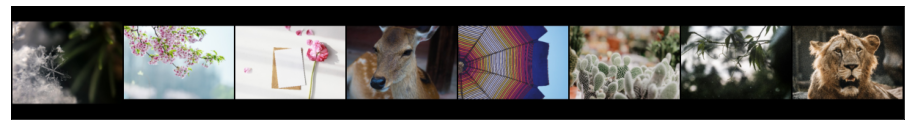

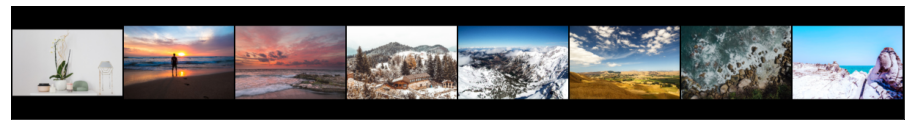

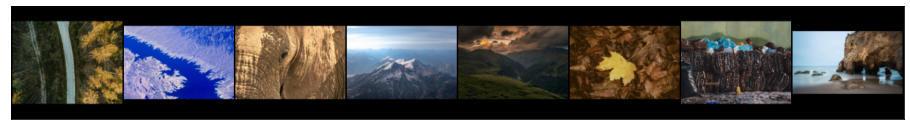

In [8]:
# Visualize data as a grid

# plot images grid of single batch
def show_batch(dl):
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break
        
show_batch(train_dl)
show_batch(val_dl)
show_batch(test_dl)

# Functions

In [8]:
# Functions

# Basic training/validation structure
class TrainAndValidation(nn.Module):

    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = nn.functional.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = nn.functional.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
    
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad() # disables tracking of gradients - saves run time & memory consumption
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

***nn.Module -> To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.***

# CNN Model

In [34]:
# Model

# get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu" # cuda equals strictly Nvidia
print("Using {} device\n".format(device))

# CNN
class BasicCNN(TrainAndValidation):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            
            nn.Conv2d(3, 8, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(8, 16, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        )

    def forward(self, x):
        return self.network(x)

# print model's structure
model = BasicCNN().to(device)
print(model)

Using cuda device

BasicCNN(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), paddin

# CNN Training

In [12]:
# Train CNN

model = BasicCNN()
num_epochs = 30
lr = 0.0001
optimizer = torch.optim.Adam

# fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, model, train_dl, val_dl, optimizer)

Epoch [0], train_loss: 0.6937, val_loss: 0.6933, val_acc: 0.4960
Epoch [1], train_loss: 0.6938, val_loss: 0.6931, val_acc: 0.5972
Epoch [2], train_loss: 0.6932, val_loss: 0.6925, val_acc: 0.5813
Epoch [3], train_loss: 0.6883, val_loss: 0.6684, val_acc: 0.6210
Epoch [4], train_loss: 0.6751, val_loss: 0.6385, val_acc: 0.6567
Epoch [5], train_loss: 0.6622, val_loss: 0.6568, val_acc: 0.6448
Epoch [6], train_loss: 0.6339, val_loss: 0.6309, val_acc: 0.6746
Epoch [7], train_loss: 0.6286, val_loss: 0.6175, val_acc: 0.6706
Epoch [8], train_loss: 0.6206, val_loss: 0.6546, val_acc: 0.5754
Epoch [9], train_loss: 0.6231, val_loss: 0.6055, val_acc: 0.6845
Epoch [10], train_loss: 0.6050, val_loss: 0.6120, val_acc: 0.6905
Epoch [11], train_loss: 0.5941, val_loss: 0.5969, val_acc: 0.6944
Epoch [12], train_loss: 0.5865, val_loss: 0.5954, val_acc: 0.6964
Epoch [13], train_loss: 0.5767, val_loss: 0.5941, val_acc: 0.6885
Epoch [14], train_loss: 0.5633, val_loss: 0.5875, val_acc: 0.7044
Epoch [15], train_lo

# Accuracy/Loss Plotting

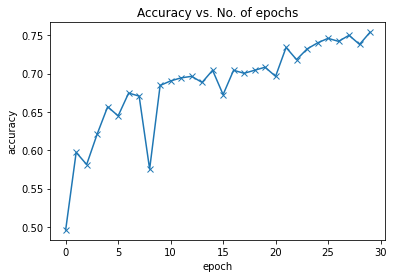

In [13]:
# Plot Accuracy

def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)


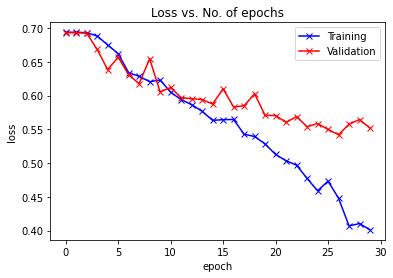

In [14]:
# Plot Loss

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

# CNN Testing

In [46]:
# Testing

model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dl:
        images = images.to(device)
        labels = labels.to(device)

        # Show the real labels on the screen 
        print('Real labels: ', ' '.join('%4s' % labels))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        # Show the predicted labels on the screen to compare with the real ones
        print('Predicted:   ', ' '.join('%4s' % predicted))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Real labels:  t e n s o r ( [ 0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ] ,   d e v i c e = ' c u d a : 0 ' )
Predicted:    t e n s o r ( [ 0 ,   0 ,   1 ,   0 ,   1 ,   1 ,   0 ,   0 ] ,   d e v i c e = ' c u d a : 0 ' )
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Real labels:  t e n s o r ( [ 0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ] ,   d e v i c e = ' c u d a : 0 ' )
Predicted:    t e n s o r ( [ 0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ] ,   d e v i c e = ' c u d a : 0 ' )
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Real labels:  t e n s o r ( [ 0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ] ,   d e v i c e = ' c u d a : 0 ' )
Predicted:    t e n s o r ( [ 0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ,   0 ] ,   d e v i c e = ' c u d a : 0 ' )
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Save Model

In [22]:
# Save the model on Google Drive

model_save_name = 'dof_model.pth'
path = F"/content/drive/My Drive/PSA Models/{model_save_name}" 
torch.save(model.state_dict(), path)
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Load Model

In [36]:
# Load the model from Google Drive

model_save_name = 'dof_model.pth'
path = F"/content/drive/My Drive/PSA Models/{model_save_name}" 
model.load_state_dict(torch.load(path))

<All keys matched successfully>